# Kanye Lyrics: EDA, Song Generator, Topic Modelling

Use case: Kanye West

- [0. Introduction](#0.-Introduction)
- [1. Load data](#1.-Load-data)
- [2. Feature Engineering](#2.-Feature-Engineering)
- [3. Distributions](#3.-Distributions)
  * [3.1 Word Length Distribution](#3.1-Word-Length-Distribution)
  * [3.2 Most common words](#3.2-Most-common-words)
  * [3.3 Most common longer words](#3.3-Most-common-longer-words)
  * [3.4 Most common n-grams](#3.4-Most-common-n-grams)
    + [3.4.1 Most common bi-grams](#3.4.1-Most-common-bi-grams)
    + [3.4.2 Most common tri-grams](#3.4.2-Most-common-tri-grams)
    + [3.4.3 Most common quad-grams](#3.4.3-Most-common-quad-grams)
- [4. Sentiment](#4.-Sentiment)
  * [4.1 Sentiment Score distribution](#4.1-Sentiment-Score-distribution)
  * [4.2 Correlation](#4.2-Correlation)
  * [4.3 Pairwise relationships](#4.3-Pairwise-relationships)
  * [4.4 Lexical density sentiments](#4.4-Lexical-density-sentiments)
  * [4.5 Non-parametric estimates](#4.5-Non-parametric-estimates)
- [5. Song Generator via Markov chain](#5.-Song-Generator-via-Markov-chain)
  * [5.1 Generate Random Song](#5.1-Generate-Random-Song)
  * [5.2 Generate Song on Trump](#5.2-Generate-Song-on-Trump)
- [6. Topic Modelling](#6.-Topic-Modelling)
  * [6.1 Top n-grams from topics](#6.1-Top-n-grams-from-topics)
  * [6.2 Sentiment across Topics](#6.2-Sentiment-across-Topics)
  * [6.3 Lexical Density across Topics](#6.3-Lexical-Density-across-Topics)
- [7. Next Steps](#7.-Next-Steps)

# 0. Introduction

This is a weekend stab at song lyrics, this time, it will be [Kanye West's songs](https://www.kaggle.com/viccalexander/kanyewestverses/data).

We'll attempt to do following:

1. Derive metrics from raw text, visualize distributions
2. Tell stories though visuals
3. Sentiment analysis
4. Random song lyrics generator with Markov Chains
5. Extract themes automatically aka topic modelling

Dependencies: Pandas, Numpy, Seaborn, NLTK, scikit-learn

# 1. Load data

In [1]:
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='talk', style='ticks')
%matplotlib inline

Read text file into dataframe and split songs into rows

In [2]:
df = pd.DataFrame({'lyrics': io.open('../input/kanye_verses.txt', 'r', encoding='ascii', errors='ignore').read().split('\n\n')})

Take a look at the dataframe head

In [3]:
df.head()

,lyrics
0,Let the suicide doors up\nI threw suicides on ...
1,"She said, ""'Ye, can we get married at the mall..."
2,"Break records at Louis, ate breakfast at Gucci..."
3,What you doin' in the club on a Thursday?\nShe...
4,"I wanna fuck you hard on the sink\nAfter that,..."


Take a closer look at sample lyrics. Each Song has multiple lines like sentences. No paragraphs.

In [4]:
df.loc[0, 'lyrics']

"Let the suicide doors up\nI threw suicides on the tour bus\nI threw suicides on the private jet\nYou know what that mean, I'm fly to death\nI step in Def Jam buildin' like I'm the shit\nTell 'em give me fifty million or I'ma quit\nMost rappers' taste level ain't at my waist level\nTurn up the bass 'til it's up-in-yo-face level\nDon't do no press but I get the most press kit\nPlus, yo, my bitch make your bitch look like Precious\nSomethin' 'bout Mary, she gone off that molly\nNow the whole party is melted like Dal\nNow everybody is movin' they body\nDon't sell me apartment, I'll move in the lobby\nNiggas is loiterin' just to feel important\nYou gon' see lawyers and niggas in Jordans"

# 2. Feature Engineering

Derive text related metrics (number of characters, words, lines, unique words) and lexical density for each song.

In [5]:
# characters, words, lines
df['#characters'] = df.lyrics.str.len() # L,S,B,W,....
df['#words'] = df.lyrics.str.split().str.len() # Let the , She said ... 
df['#lines'] = df.lyrics.str.split('\n').str.len() # num of lines
df['#uniq_words'] = df.lyrics.apply(lambda x: len(set(x.split()))) # unique words 
df['lexical_density'] = df['#uniq_words'] / df['#words'] 

Lexical_density : 구조와 복잡도 평가하는 요소

https://en.wikipedia.org/wiki/Lexical_density#cite_note-Halliday1985p61-1

We now have 1 text column and 5 metrics.

In [6]:
df.head()

,lyrics,#characters,#words,#lines,#uniq_words,lexical_density
0,Let the suicide doors up\nI threw suicides on ...,675,131,16,99,0.755725
1,"She said, ""'Ye, can we get married at the mall...",788,149,18,112,0.751678
2,"Break records at Louis, ate breakfast at Gucci...",1479,286,33,212,0.741259
3,What you doin' in the club on a Thursday?\nShe...,632,101,16,80,0.792079
4,"I wanna fuck you hard on the sink\nAfter that,...",748,144,18,96,0.666667


# 3. Distributions

Now that we have text metrics, a quick histogram spread on all metrics.

- Most songs are under 1000 characters, 15 lines, 200 words.
- Most songs use around 100 unique words
- Lexical density is spread across, mostly curved up between 0.6 and 0.8.
- Lexical density is pretty high considering how other singer's lyrics usually are..

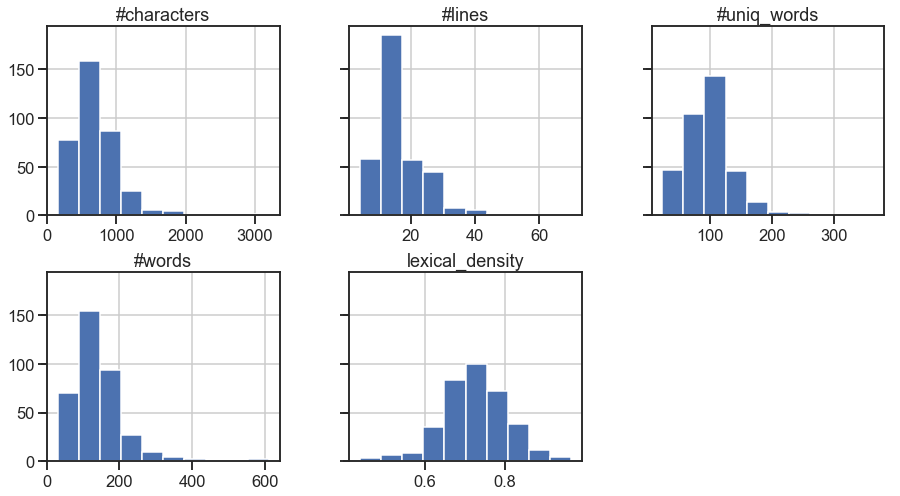

In [7]:
df.hist(sharey=True, layout=(2, 3), figsize=(15, 8)); # share - y

Alternatively, look at violenplots for distributions.

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


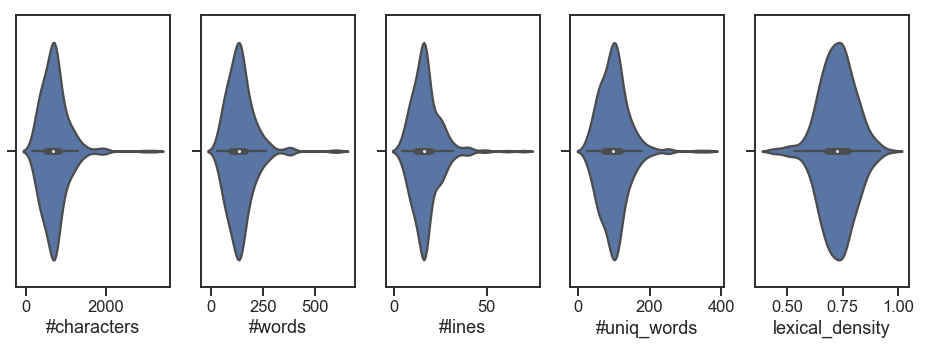

In [8]:
cols_metrics = df.select_dtypes(include=[np.number]).columns
fig, axs = plt.subplots(ncols=len(cols_metrics), figsize=(16, 5))
for i, c in enumerate(cols_metrics):
    sns.violinplot(x=df[c], ax=axs[i], sharex=True)

## 3.1 Word Length Distribution

Looking at the word lengths, median length is 4 letters. 
But there exists decent long tail of longer length words.

- Word lengths between 1-5 cover 85% of the total words used.

In [9]:
print(df.lyrics)

0      Let the suicide doors up\nI threw suicides on ...
1      She said, "'Ye, can we get married at the mall...
2      Break records at Louis, ate breakfast at Gucci...
3      What you doin' in the club on a Thursday?\nShe...
4      I wanna fuck you hard on the sink\nAfter that,...
5      Coke on her black skin made it stripe like a z...
6      Now if I fuck this model\nAnd she just bleache...
7      My momma was raised in the era when\nClean wat...
8      I throw these Maybach keys\nI wear my heart on...
9      I just need to clear my mind now\nIt's been ra...
10     We could've been somebody\n'stead you had to t...
11     You could've been somebody\nWe could've ugh, w...
12     To all my second string bitches, try and get a...
13     For my theme song (black)\nMy leather black je...
14     Stop all that coon shit (black)\nEarly morning...
15     They smile in my face is what I don't like\nTh...
16     The best living or dead hands down, huh\nLess ...
17     This Ye, nigga\nShoppin'

In [10]:
for x in ' '.join(df.lyrics).split():
    print(x)

Let
the
suicide
doors
up
I
threw
suicides
on
the
tour
bus
I
threw
suicides
on
the
private
jet
You
know
what
that
mean,
I'm
fly
to
death
I
step
in
Def
Jam
buildin'
like
I'm
the
shit
Tell
'em
give
me
fifty
million
or
I'ma
quit
Most
rappers'
taste
level
ain't
at
my
waist
level
Turn
up
the
bass
'til
it's
up-in-yo-face
level
Don't
do
no
press
but
I
get
the
most
press
kit
Plus,
yo,
my
bitch
make
your
bitch
look
like
Precious
Somethin'
'bout
Mary,
she
gone
off
that
molly
Now
the
whole
party
is
melted
like
Dal
Now
everybody
is
movin'
they
body
Don't
sell
me
apartment,
I'll
move
in
the
lobby
Niggas
is
loiterin'
just
to
feel
important
You
gon'
see
lawyers
and
niggas
in
Jordans
She
said,
"'Ye,
can
we
get
married
at
the
mall?"
I
said,
"Look,
you
need
to
crawl
'fore
you
ball
Come
and
meet
me
in
the
bathroom
stall
And
show
me
why
you
deserve
to
have
it
all."
(Ball
so
hard)
That
shit
cray,
ain?t
it
Jay?
What
she
order,
fish
filet?
"Your
whip
so
cold"
??
this
old
thing?
Act
like
you?ll
ever
be
around


now
Think
you
motherfuckers
really
really
need
to
cool
out
Cause
you'll
never
get
on
top
of
this
So
mommy,
best
advice
is
just
to
get
on
top
of
this
Have
you
ever
had
sex
with
a
pharaoh?
Put
the
pussy
in
a
sarcophagus
Now
she
claiming
that
I
bruised
her
esophagus
Head
of
the
class
and
she
just
won
a
swallowship
I'm
living
in
the
future
so
the
present
is
my
past
My
presence
is
a
present,
kiss
my
ass
This
Ye,
nigga
Shoppin'
for
the
winter
and
it?s
just
May,
nigga
Ball
so
hard,
man,
this
shit
cray,
nigga
And
you
ain't
gettin'
money
'less
you
got
eight
figures
For
that
Jesus
piece,
man,
I've
been
saved,
nigga
Just
talked
to
Farrakhan,
that's
sensei,
nigga
Told
him
I've
been
on
ten
since
the
10th
grade,
nigga
Got
a
middle
finger
longer
than
Dikembe,
my
nigga,
uh
I
don't
let
'em
play
with
me
I
don't
let
'em
talk
to
me
no
kind
of
way
Uh,
they
better
watch
what
they
say
to
me
Niggas
still
gettin'
popped
on
the
day
to
day
Yeah,
I
still
got
the
hundred
with
the
small
face,
nigga
Might
spend
50
r

boss
you
need
an
extra
hour
off
Get
you
super
wet
after
we
turn
the
shower
off
Uh,
picked
up
where
we
left
off
Uh,
I
need
you
home
when
I
get
off
Uh,
you
know
I
need
that
wet
mouth
Uh,
I
know
you
need
that
reptile
Uh,
she
cut
from
a
different
textile
Uh,
she
love
different
kinds
of
sex
now
Uh,
black
girl
sippin'
white
wine
Put
my
fist
in
her
like
a
civil
rights
sign
And
grabbed
it
with
a
slight
grind
And
held
it
'til
the
right
time
Then
she
came
like
AAAAAHHH!
Bitch
I'm
back
out
my
coma
Wakin'
up
on
your
sofa
When
I
park
my
Range
Rover
Slightly
scratch
your
Corolla
Okay,
I
smashed
your
Corolla
I'm
hangin'
on
a
hangover
Five
years
we
been
over
Ask
me
why
I
came
over
One
more
hit
and
I
can
own
ya
One
more
fuck
and
I
can
own
ya
One
cold
night
in
October
Pussy
had
me
floatin'
Feel
like
Deepak
Chopra
Pussy
had
me
dead
Might
call
2Pac
over
Yeezy's
all
on
your
sofa
These
the
Red
Octobers
Still
ain't
learn
me
no
manners
You
love
me
when
I
ain't
sober
You
love
me
when
I'm
hungover
Even
when
I
b

fuckin'
wolves"
(What
if
Mary)
"What
if
Mary
(Was
in
the
club)
was
in
the
club
'Fore
she
met
Joseph
with
no
love?
Cover
Saint
in
lambs'
wool
(And
she
was)
We
surrounded
by
(Surrounded
by)
the
fuckin'
wolves"????
I
been
waiting
for
a
minute
For
my
lady
So
I
can't
jeopardize
that
for
one
of
these
hoes
I
been
living
without
limits
As
far
as
my
business
I'm
the
only
one
that's
in
control
I
been
feeling
all
I've
given
For
my
children
I
will
die
for
those
I
love
God,
I'm
willing
To
make
this
my
mission
Give
up
the
women
Before
I
lose
half
of
what
I
own
I
been
thinking
About
my
vision
Pour
out
my
feelings
Revealing
the
layers
to
my
soul
My
soul
The
layers
to
my
soul
Revealing
the
layers
to
my
soul
See,
before
I
let
you
go
One
last
thing
I
need
to
let
you
know
You
ain't
never
seen
nothing
crazier
than
This
nigga
when
he
off
his
Lexapro
Remember
that
last
time
in
Mexico
Remember
that
last
time,
the
episode
Asking
me
why
the
hell
I
text
in
code
Four
times
just
to
say
don't
text
me
hoe
Told
you
f

if
you
don't
mind,
I'ma
keep
you
on
call
We
above
the
law,
we
don't
give
a
fuck
about
y'all
I
got
dogs
that'll
chew
a
fucking
hole
through
the
wall
But
since
they
all
lovers,
I
need
more
rubbers
And
if
I
don't
use
rubbers,
need
more
covers
Housekeeping,
I
mean
goddamn
One
time
let
it
be
a
bad
bitch
sweeping
That
know
we
get
O's
like
Cheerios
That
know
because
they
seen
us
in
the
videos
That
know
the
day
that
you
play
me
Would
be
the
same
day
MTV
play
videos
That
was
a
little
joke,
voila
Praises
due
to
the
most
high,
Allah
Praises
due
to
the
most
fly,
Prada
Baby,
I'm
magic,
tada
Address
me
as
your
highness,
high
as
United
30,000
feet
up
and
you
are
not
invited
Niggas
be
writing
bullshit
like
they
gotta
work
Niggas
is
going
through
real
shit,
man,
they
out
of
work
That's
why
another
goddamn
dance
track
gotta
hurt
That's
why
I'd
rather
spit
something
that
got
a
purp'
Man
I
promise,
she's
so
self-conscious
She
has
no
idea
what
she's
doing
in
college
That
major
that
she
majored
in
don't
mak

how
my
face
felt
You
would
know
how
Mase
felt
Thank
God
I
ain't
too
cool
for
the
safe
belt
I
swear
to
God,
Driver
2
wants
to
sue
I
got
a
lawyer
for
the
case
to
keep
what's
in
my
safe
safe
My
dawgs
couldn't
tell
if
I...
I
looked
like
Tom
Cruise
in
Vanilla
Sky
It
was
televised
There's
been
an
accident
like
GEICO
They
thought
I
was
burnt
up
like
Pepsi
did
Michael
I
must
got
a
angel,
?cause
look
how
death
missed
his
ass
Unbreakable,
what,
you
thought
they'd
call
me
Mr.
Glass?
Look
back
on
my
life
like
the
Ghost
of
Christmas
Past
Toys
"R"
Us
where
I
used
to
spend
that
Christmas
cash
And
I
still
won't
grow
up,
I'm
a
grown-ass
kid
Swear
I
should
be
locked
up
for
stupid
shit
that
I
did
But
I'm
a
champion,
so
I
turned
tragedy
to
triumph
Make
music
that's
fire,
spit
my
soul
through
the
wire
Let's
get
lost
tonight
You
could
be
my
black
Kate
Moss
tonight
Play
secretary,
I'm
the
boss
tonight
And
you
don't
give
a
fuck
what
they
all
say,
right?
Awesome,
the
Christian
in
Christian
Dior
Damn,
they
don'

I
know
I'm
on
your
beams
One
set
of
footsteps,
you
was
carryin'
me
When
I
turned
on
the
news
and
they
was
buryin'
me
One
set
of
footsteps,
you
was
carryin'
me
When
I
was
negotiatin'
with
Apple,
it
was
Larry
and
me
Told
Tim
Cook
to
call
me,
I
was
scary
to
see
I
would've
took
a
hundred
million
and
gave
20
to
Hov
I
heard
it's
the
way
they
did
it
when
we
only
had
a
stove
But
it's
better
that
I
stayed
at
home
with
my
folks
Cause
if
Jay
a
billionaire
then
I'ma
never
go
broke
Only
thing
I
ask
is
next
time
I'm
on
stage
we
all
go
We
all
go
Not
just
by
myself,
lookin'
for
niggas
like
where's
Waldo
She
got
the
same
shoes
as
my
wife
but
she
copped
'em
at
Aldo
Modern
day
MJ
with
a
off
the
wall
flow
Closed
eyes,
see
things
Fire
up,
tweaking
You
in
my
freak
dreams
You
in
my
freak
dreams
Bad
bitch,
you
dig
that
Get
stacks,
drive
cars
Whip
out,
bitch
out
Tits
out,
oh
shit
My
dick
out,
can
she
suck
it
right
now?
Fuck,
can
she
fuck
right
now?
I
done
asked
twice
now
Can
you
bring
your
price
down?
Lil
Boos

more
than
doo
rags
to
get
you
waves
Nothing
sad
as
that
day
my
girl's
father
passed
away
So
I
promised
to
Mr.
Rainey
I'm
gonna
marry
your
daughter
And
you
know
I
gotta
thank
you
for
the
way
that
she
was
brought
up
And
I
know
that
you
were
smiling
when
you
see
the
car
I
bought
her
You
sent
tears
from
heaven
when
you
seen
my
car
get
balled
up
But
I
can't
complain
what
the
accident
did
to
my
left
eye
Cause
look
what
an
accident
did
to
Left
Eye
First
Aaliyah
now
Romeo
must
die
I
know
I
got
angels
watching
me
from
the
other
side
It's
the
Hard
Knock
Life
Tour,
sellout;
picture
Us
in
the
mall,
coppin'
Iceberg
and
yell
out
"Jigga"
Yeah,
that's
what
we'll
yell
out,
yell
out
You
know
the
name
do
I
gotta
spell
out
or
tell
'bout
J-A-Y,
and
'Ye
so
shy
Now
he
won't
even
step
to
his
idol
to
say
hi
Standing
there
like
a
mime
and
let
the
chance
pass
by
Back
of
my
mind,
"He
could
change
your
life
With
all
these
beats
I
did,
at
least
let
him
hear
it
At
least
you
can
brag
to
ya
friends
back
at
the
gig"
Bu

excited
Well
we
gon'
tour
the
countryside
and
they
won't
be
invited
We
will
not
be
disturbed
by
the
fussin'
and
fighting
Tell
Peaches
light
the
herb
cause
we
just
reunited
Let's
make
a
move
from
these
herbs,
go
somewhere
in
private
I'm
talking
just
me
and
you
and
the
plane
and
the
pilot
How
could
you
be
so
Cold
as
the
winter
wind
when
it
breeze,
yo?
Just
remember
that
you
talking
to
me
though
You
need
to
watch
the
way
you
talking
to
me,
yo
I
mean,
after
all
the
things
that
we
been
through
I
mean,
after
all
the
things
we
got
into
Ayo,
I
know
of
some
things
that
you
ain't
told
me
Ayo,
I
did
some
things,
but
that's
the
old
me
And
now
you
wanna
get
me
back
And
you
gonna
show
me
So
you
walk
around
like
you
don't
know
me
You
got
a
new
friend,
well,
I
got
homies
But
in
the
end
it's
still
so
lonely
How
could
you
be
so
Dr.
Evil?
You
bringing
out
a
side
of
me
that
I
don't
know
I
decided
we
wasn't
gonna
speak,
so
Why
we
up
3
AM
on
the
phone?
Why
do
she
be
so
mad
at
me
for?
Homie,
I
don't
know,
sh

no
man,
man,
I'm
my
own
man
But
as
a
shorty
I
looked
up
to
the
dopeman
Only
adult
man
I
knew
that
wasn't
broke,
man
Flickin'
Starter
coats,
man
Man,
you
don't
know,
man
We
don't
care
what
people
say
This
is
for
my
niggas
outside
all
winter
Cause
this
summer
they
ain't
finna
say:
"next
summer
I'm
finna"
Sittin'
in
the
hood
like
community
colleges
This
dope
money
here
is
Lil'
Trey's
scholarship
Cause
ain't
no
tuition
for
having
no
ambition
And
ain't
no
loans
for
sittin'
your
ass
at
home
So
we
forced
to
sell
crack,
rap,
and
get
a
job
You
gotta
do
somethin'
man,
your
ass
is
grown
The
second
verse
is
for
my
dogs
workin'
9
to
5
that
still
hustle
Cause
a
nigga
can't
shine
off
$6.55
And
everybody
sellin'
makeup,
Jacob's
And
bootlegged
tapes
just
to
get
they
cake
up
We
put
shit
on
layaway,
then
come
back
We
claim
other
people
kids
on
our
income
tax
We
take
that
money,
cop
work,
then
push
packs
to
get
paid
And
we
don't
care
what
people
say
Momma
say
she
wanna
move
South
Scratchin'
lottery
ticket

Now
I'm
makin'
somethin'
they
can't
take
from
me
And
I'm
fresh
out
of
debt
in
this
mothafucka!
And
they
still
ain't
ready
yet
for
a
mothafucka!
Yeezy
might
have
to
go
and
put
his
Louis
on
I'm
'bout
to
go
Gucci
in
the
Gucci
store
I'm
not
loving
you,
way
I
wanted
to
What
I
had
to
do,
had
to
run
from
you
I'm
in
love
with
you,
but
the
vibe
is
wrong
And
that
haunted
me,
all
the
way
home
So
you
never
know,
never
never
know
Never
know
enough,
'til
it's
over
love
'Til
we
lose
control,
SYSTEM
OVERLOAD
Screaming,
"No,
no,
no,
n-nooo!"
I'm
not
loving
you,
way
I
wanted
to
See
I
wanna
move,
but
can't
escape
from
you
So
I
keep
it
low,
keep
a
secret
code
So
everybody
else
don't
have
to
know
I'm
not
loving
you,
way
I
wanted
to
I
can't
keep
my
cool,
so
I
keep
it
true
I
got
something
to
lose,
so
I
gotta
move
I
can't
keep
myself,
and
still
keep
you
too
So
I
keep
in
mind,
when
I'm
on
my
own
Somewhere
far
from
home,
in
the
danger
zone
How
many
times
did
I
tell
you
'fore
it
finally
got
through?
You
lose,
yo

I
can
make
you
high
I
can
make
you
fly
Make
you
touch
the
sky
hey
maybe
so
All
of
the
time
You
be
up
in
mine
checking
through
my
cell
phone
baby
no
You
wanna
kill
the
vibe
on
another
night
Here's
another
fight
oh
here
we
go
All
of
the
time
You
wanna
complain
about
the
nights
alone
So
now
you're
here
with
me
Show
some
gratitude
leave
the
attitude
way
back
at
home
Yea
you
see
em
look
Baby
let
em
look
give
us
cold
looks
cause
we
look
cold
Yea
you
heard
about
all
the
word
of
mouth
Don't
worry
about
what
we
can't
control
All
the
talk
in
the
world
lost
in
the
world
Till
you
finally
let
that
thing
go
You
wanna
check
in
to
the
heartbreak
hotel
But
sorry
we're
closed
How
we
stop
the
Black
Panthers?
Ronald
Reagan
cooked
up
an
answer
You
hear
that?
What
Gil
Scott
was
hearing
When
our
heroes
or
heroines
got
hooked
on
heroin
Crack
raised
the
murder
rate
in
D.C.
and
Maryland
We
invested
in
that,
it's
like
we
got
Merrill
lynched
And
we
been
hangin'
from
the
same
tree
ever
since
Sometimes
I
feel
the
m

slaves
that
was
slaughtered
in
the
1800s
Y'all
forget
that
I
got
called
"nigga"
On
Twitter
so
many
times,
yo,
I
lived
that
Now
I'm
just
tryna
find
where
to
raise
my
kids
at
Cause
they
don't
want
niggas
next
to
where
they
crib
at
Hey
realtor,
I'm
lookin'
for
a
nice
park
Twelve
noon,
she
said
my
family
gon'
make
it
too
dark
This
is
the
flow
that
solar
eclipses
So
hopefully
one
day
that
real
soul
will
eclipse
The
bullshit
they
got
us
listening
to
in
this
existence
Don't
give
up
now
just
a
little
more
persistence
I
am
the
day
Ice
Cube
met
Michael
Jackson
Keep
him
away,
huh?
Something
might
happen
This
is
the
making
of
a
masterpiece
So
we
broke
out
the
chains
and
told
the
master
"Peace!"
I
sold
my
soul
to
the
devil:
that's
a
crappy
deal
Least
it
came
with
a
few
toys
like
a
Happy
Meal
This
game
you
could
never
win
Cause
they
love
you
then
they
hate
you
then
they
love
you
again
Get
away
from
me
misery
Get
away
from
me
lonliness
Get
away
from
me
fake
bitches,
I
can?t
take
the
phoniness
Get
awa

barely
bra
fit
Aw
shit!
He
back
on
his
feet
like
carpet
He
was
just
playing
possum
Playing
like
I
wasn't
awesome?
Yeah
I
got
some
jokes,
don't
I?
Ha
ha
ha,
laugh
it
up
And
they'll
be
wack
And
we'll
be
the
last
ones
cracking
up
Matter
fact,
because
you
nigga
wanna
doubt
me?
Let's
see
how
it
feel
without
me
Taking
off
on
this
rocket,
Yao
Ming
I
don't
wanna
hear
that
bull
shit,
I
wanna
hear
that
official
shit
Kanye
and
that
Twista
shit
that's
so
impossible
to
get
it
(it's
just
impossible)
Get
it,
that's
so
impossible
to
get
it
Get
it,
that's
so
impossible
to
get
it
(It's
impossible)
Get
it,
roll
the
weed
up
and,
lit
it
Smoke
a
little
but
don't,
admit
it
Do
it
like
I
did
too
late,
I
did
it
The
controversy
can't
worse
me
man;
I'm
eating
but
I'm
still
thirsty
and
Thirsty
what
is
you
saying
I
gotta
a
duel
with
a
couple
niggas
that's
Thursday
man
Why
the
hell
is
I'm
worrying,
hopping
out
the
Benz
with
the
perfect
10
"Man
your
life
must
be
perfect
man,
look
at
how
they
came
up
with
the
perfect


duffle
bag
And
them
brand
new
titties
cost
a
couple
racks
Feelin'
on
a
girl's
ass
with
a
troubled
past
Chainsmokin'
every
day,
at
least
a
couple
packs
You
know
I
always
hit
you
deeper
than
a
baritone
Bone
you
with
my
jewelry
on,
that's
a
herringbone
Hotter
than
Arizon',
fresher
than
aerosol
These
condom
rappin'
ass
niggas
wasn't
ever
raw
It's
aiight,
but
it
ain't
Ralph
though
And
unless
you're
money-talkin'
keep
your
mouth
closed
We
smokin'
indo
outdoor,
in
Palo
Alto
If
this
party
ain't
got
hoes,
my
intro's
my
outro
Woo!
You
will
never
need
another
lover
Woo!
Cause
you
a
milf
and
I'm
a
motherfucker
Told
you
give
the
drummer
some,
now
the
drummer
cummin'
I'm
pa
rum
pa
pum
pumin'
all
on
your
stomach
Yeah,
tonight
I
see
some
super
freaky
hoes
That
could
go
from
bein'
stripper
to
a
super
CEO
I
don't
know
the
way
you
do
it,
but
you
do
it
to
me
though
And
you
always
told
your
girlfriends
you
need
you
a
TV
show
Now
you
got
your
own
money,
you
don't
need
nobody
else
But
far
as
handlin'
all
tha

the
day?
Fly
across
the
earth,
put
things
in
reverse
I
wish
this
life
was
a
movie
I
could
just
rehearse
Certain
things
I
can't
doctor,
and
you
say
I'm
the
worst
I
ain't
have
enough
patients,
but
I
needed
a
nurse
That'll
come
by
my
bed
late
See
if
my
head
ache
Then
get
my
head
straight
Then
give
my
head,
great
Every
time
I
popped
up
like
the
VCR
I
took
your
breath
away,
then
we
performed
CPR
With
all
the
cars,
the
clothes,
the
lights,
the
boats
I
guess
I
was
just
trying
to
sow
my
royal
oats
In
the
penthouse
position
With
penthouse
bitches
See
I
Pimp'd
My
crib,
so
I
must
exhibit
Shit,
these
last
years
been
a
haze
like
Issac
So
I
close
my
eyes
Tighter
than
Asian
eyes
get
Realized
I
got
the
same
wings
angels
fly
with
Louis
Vuitton
feathers,
now
that
some
fly
shit
Verbal
asked
me
do
I
need
a
pen?
Not
right
now
Everything
I
write
now
I
don't
even
write
down
I
don't
need
her
right
now
But
I'm
so
bad
Ask
her
can
she
hold
my
gonads
before
they
go
bad
Since
I
did
a
song
with
Teriyaki
I
been
acti

out
my
name
then
you
know
they
gon'
go
Dumb,
you
fuckin'
up
my
mode,
man
I
told
you
only
call
me
by
my
codename
They
already
recognize
me
from
my
gold
chain
The
same
one
I
gave
Keyshia
Cole,
man
Now
go
dumb
like
Cole
on
Martin,
I'm
retarded
Kanye
to
the
I
ask
God
to
help
me
fly
away
And
if
not
Then
please
keep
your
eye
on
me
These
niggas
is
bringing
out
the
worst
side
of
me
When
you
wired
me
You
inspired
me
To
become
the
higher
me
These
execs
All
want
the
details
How
I
made
the
world
bounce
like
Full
messages
on
e-mails
But
they
hiding
something
like
she-males
So
We
still
Pull
up
in
Sprewells
The
ice
and
me
chill
Like
Goldmember,
I
love
gold
What's
the
point
to
gain
the
world
if
you
lose
your
soul
Now
Niggas
forcing
me
to
keep
the
heat
up
Black
strap,
white
handle,
I
got
jungle
fever
I
went
platinum
And
I
don't
rap
guns
My
diamonds
is
whiter
than
Michael
Jackson's
Me
and
Miri
make
music
you
can
hold
in
time
So
take
a
second
to
listen
it
may
blow
your
mind
Ahh...
The
sweet
taste
of
vict

like
shorty
on
the
'Sixth
Sense'
Y'all
finna'
see
some
dead
people
Come
through
ya
block
and
air
people
My
people
ain't
scared
people,
only
FIG-I-AIR
people
Uh,
if
you
got
any
little
freak
in
you
then
I'mma
find
it
These
niggas
read
the
pimp
manual,
but
I
designed
it
I
see
you
bouncing
it
up
and
down
and
ooh
I
like
it
I
know
you
gon'
be
mine,
because
ooh
I'm
psychic
You
said
you
taste
like
candy
do,
right?
Why
don't
you
go
ahead,
let
me
get
two
bites
How
about
this:
bust
out
the
whip
cream
We
could
have
a
real
freaky
food
fight
Oh
no,
it's
getting
too
tight
So
I
never
ever
say
I'm
rapping
too
tight
If
I
come
in
the
middle
of
the
night,
then
Myleka
I'mma
do
whatever
you
like
Good
morning
to
umm,
I
don't
remember
your
name
But
I
remember
the
brain,
here
go
a
fare
for
the
train
and
Good
morning
to
Chi-Town,
where
my
niggas
ride
down
To
bust
clowns
and
look
for
some
bust
downs
to
bust
down
Yeah,
she
ain't
got
a
car
she
on
the
bus
now
But
her
gear
is
bangin,
she
one
of
us
now
I
wanted
badly

And
give
me
scoliosis
until
I
comatoses
And
do
it
while
I'm
sleep,
yeah
a
little
osmosis
And
that's
my
commandment
you
ain't
gotta
ask
Moses
More
champagne,
more
toasts-es
More
damn
planes,
more
coasts-es
And
fuck
a
bus,
the
Benz
is
parked
like
Rosa
Ohsa
It's
crazy
how
you
can
go
from
being
Joe
Blow
To
everybody
on
your
dick;
no
homo
I
bought
my
whole
family
whips;
no
Volvos
Next
time
I?m
in
church,
please,
no
photos
Police
escorts,
everybody
passports
This
the
life
that
everybody
ask
for
This
the
fast
life,
we
are
on
a
crash
course
What
you
think
I
rap
for,
to
push
a
fuckin'
Rav
4?
But
I
know
that
if
I
stay
stunting
All
these
girls
only
gonna
want
one
thing
I
can
spend
my
whole
life
goodwill
hunting
Only
good
gonna
come
is
it's
good
when
I'm
cumming
She
got
an
ass
that'll
swallow
up
a
G-string
And
up
top,
ah,
two
bee
stings
And
I'm
beasting
off
the
Riesling
And
my
nigga
just
made
it
out
the
precinct
We
give
a
damn
about
the
drama
that
your
dude
bring
I'm
just
tryin'
to
change
the
colo

hard
it
needs
censorship
I'm
a
Chicagoan
till
Chicago
ends
Till
we
blow
like
Chicago
wind
I
don't
know
what's
better,
getting
laid
or
getting
paid
I
just
know
when
I'm
getting
one,
the
other's
getting
away
This
way
(Plain
Pat
what
up?)
Lifestyles
of
the
broke
and
famous
Let
you
know
how
crazy
this
game
is
Look
at
all
the
new
beautiful
faces
At
home
supermodel,
myspaces
Long
for
their
shot
on
the
TV
screens
American
Idol
never
seen
these
dreams
Just
last
week
they
want
to
see
ID
Now
they
got
you
in
VIP,
huh?
How
many
people
almost
famous
You
almost
remember
what
they
name
is
Like
"Hey,
didn't
you
play
in..?
No
it
couldn't
be,
quit
playin"
Try
to
keep
that
balance
After
MTV
that's
a
Real
World
Challenge
Back
on
that
train
Never
to
be
heard
from
again
Yes,
Mr.
West's
turn
that
new
child
rebel
Loud
as
a
badass
child
level
Who
need
a
chorus?
We
do
it
tyrannosaurus
Tyrone,
it?s
been
a
year
with
no
phone
Could
you
explain
how
high
is
your
zone?
We?ll
take
the
plane,
rub
his
nose
in
cocaine
Th

girl
is
bad
I'm
getting
spins
all
day
in
L.A
We
can
go
to
the
D
where
Dwele
dwell
D.C,
P.G
or
ATL
Back
in
the
Chi,
mean
my
life
like
a
magazine
Honey
wanna
know
the
details
about
my
ebony
Well
that's
XXL
Far
as
the
penthouse,
yeah
that's
upscale
Mademoiselle
got
a
hell
of
a
Black
tail
I'm
feeling
her
vibe,
her
Body
and
Soul
I
heard
you
stay
in
a
metropolitan
home
Well
lets
kill
all
the
parlayin
and
offer
you
a
cosmopolitan
Lets
jet
out
the
club,
get
some
oxygen
Your
friends
claim
I'm
a
player,
you
be
lucky
to
keep
me
But
you
know
people
gon'
be
talking
'bout
us
weekly
My
car
be
in
a
Robb
Re-p-o-r-t
but
what's
more
important
to
me
Is
that
you..


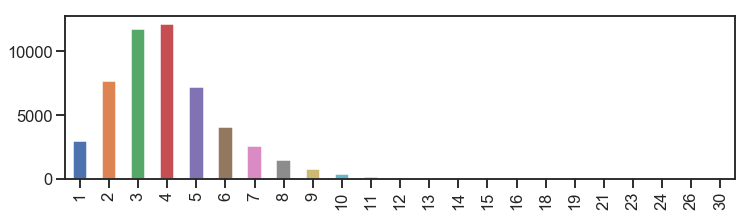

In [11]:
# Word length distribution
pd.Series(len(x) for x in ' '.join(df.lyrics).split()).value_counts().sort_index().plot(kind='bar', figsize=(12, 3))

Now, that gets us to move to look into words, phrases mostly used.

## 3.2 Most common words

Let's look at most commonly used words. We're not removing any stopwords.

- Single words may not give much insights -- `the, i you, my, me` are most common

In [46]:
pd.Series(' '.join(df.lyrics).lower().split()).value_counts()[:20][::-1]
# 상위 20개, 오름차순

so       356
but      356
of       376
your     383
they     408
we       437
on       446
i'm      449
it       470
like     500
me       529
that     577
in       656
my       753
to       997
and     1013
a       1021
you     1337
i       1845
the     1996
dtype: int64

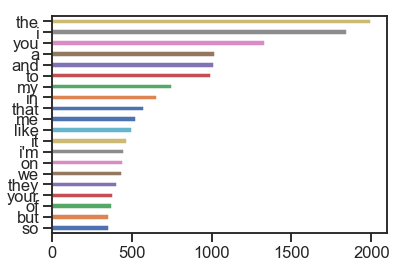

In [48]:
# top words
pd.Series(' '.join(df.lyrics).lower().split()).value_counts()[:20][::-1].plot(kind='barh')

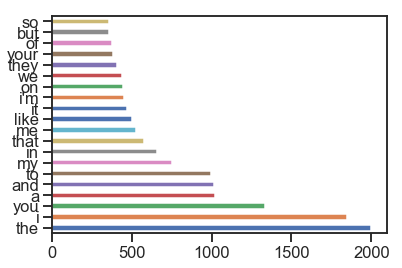

In [49]:
# top words
pd.Series(' '.join(df.lyrics).lower().split()).value_counts()[:20].plot(kind='barh')

## 3.3 Most common longer words

Among the longer words (length > 7), combination of (every|some|any)(body|thing|time) are most common.

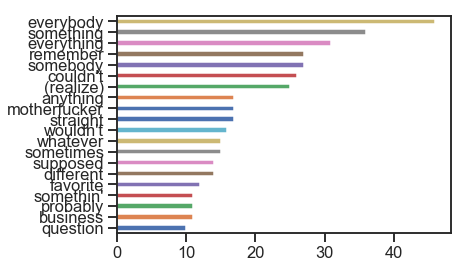

In [13]:
# top long words
pd.Series([w for w in ' '.join(df.lyrics).lower().split() if len(w) > 7]).value_counts()[:20][::-1].plot(kind='barh')

## 3.4 Most common n-grams

Let's first look at collocations, called n-grams, where we look are collated phrases.

https://wikidocs.net/21692
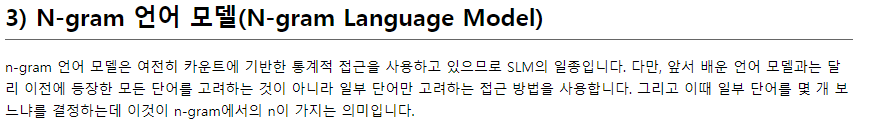

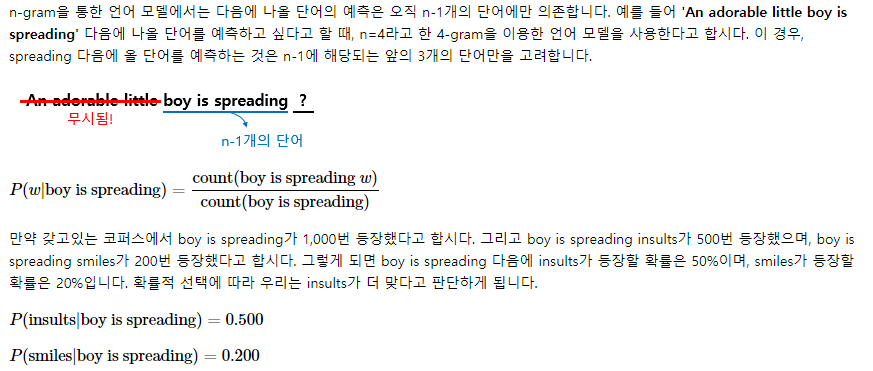

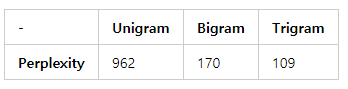
2 <= n < 5 추천

In [14]:
from nltk import ngrams

In [15]:
def get_ngrams_from_series(series, n=2):
    # using nltk.ngrams
    lines = ' '.join(series).lower().split('\n')
    lgrams = [ngrams(l.split(), n) for l in lines]
    grams = [[' '.join(g) for g in list(lg)] for lg in lgrams]
    return [item for sublist in grams for item in sublist]

### 3.4.1 Most common bi-grams

- `in the` appears to most common bi-gram with 200+ occurrences and stand out from 2, 3rd popular ones

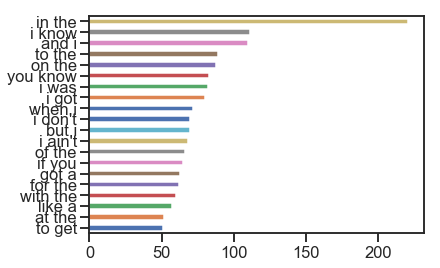

In [16]:
# Top bi-grams
pd.Series(get_ngrams_from_series(df.lyrics, 2)).value_counts()[:20][::-1].plot(kind='barh')

### 3.4.2 Most common tri-grams

- Many common trigrams start with `i` -- `i know that`, `i got a`, `i had to`, `i feel like`
- Expletives like `piss` make it to the top

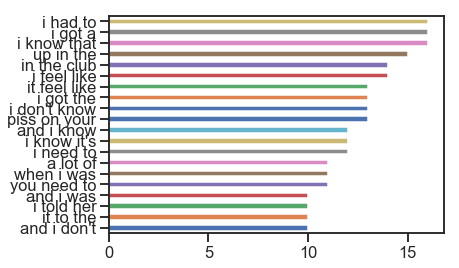

In [17]:
# Top tri-grams
pd.Series(get_ngrams_from_series(df.lyrics, 3)).value_counts()[:20][::-1].plot(kind='barh')

### 3.4.3 Most common quad-grams

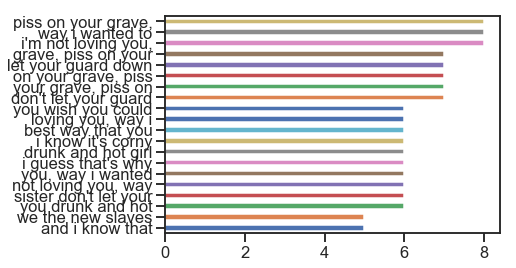

In [18]:
# Top four-grams
pd.Series(get_ngrams_from_series(df.lyrics, 4)).value_counts()[:20][::-1].plot(kind='barh')

# 4. Sentiment

Next, let's get sentiment scores of each song

In [19]:
# sentiment
import nltk
from nltk import sentiment
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hanor\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

Load the inbuilt vader Sentiment Analyzer

In [20]:
senti_analyze = sentiment.vader.SentimentIntensityAnalyzer()

Try it on first lyrics, it would return a dictionary with polarity scores, we'll use compound score only.

In [21]:
senti_analyze.polarity_scores(df.lyrics[0])

{'neg': 0.153, 'neu': 0.71, 'pos': 0.137, 'compound': -0.6658}

Apply on all lyrics and store the `['negative', 'neutral', 'positive']` segments as well.

In [22]:
df['sentiment_score'] = pd.DataFrame(df.lyrics.apply(senti_analyze.polarity_scores).tolist())['compound']
df['sentiment'] = pd.cut(df['sentiment_score'], [-np.inf, -0.35, 0.35, np.inf], labels=['negative', 'neutral', 'positive'])

Now, we have 1 text, 1 dimension, 6 metrics

In [23]:
df.head()

,lyrics,#characters,#words,#lines,#uniq_words,lexical_density,sentiment_score,sentiment
0,Let the suicide doors up\nI threw suicides on ...,675,131,16,99,0.755725,-0.6658,negative
1,"She said, ""'Ye, can we get married at the mall...",788,149,18,112,0.751678,-0.8605,negative
2,"Break records at Louis, ate breakfast at Gucci...",1479,286,33,212,0.741259,-0.9499,negative
3,What you doin' in the club on a Thursday?\nShe...,632,101,16,80,0.792079,-0.9900,negative
4,"I wanna fuck you hard on the sink\nAfter that,...",748,144,18,96,0.666667,-0.9869,negative


## 4.1 Sentiment Score distribution

Interestingly, West's songs have decent spread across the negative and positive sentiments.
Infact, most songs are either strongly positive or negative.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000011733D63780>]],
      dtype=object)

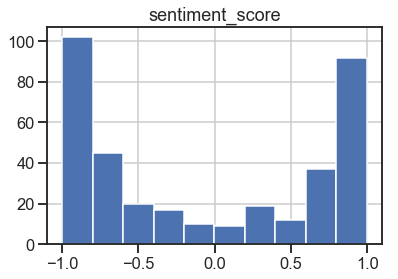

In [57]:
df[['sentiment_score']].hist(bins=10)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000011733D97278>]],
      dtype=object)

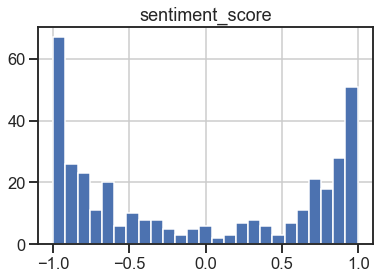

In [56]:
df[['sentiment_score']].hist(bins=25)

## 4.2 Correlation

Is there any Correlation between Sentiment Score and other metrics?

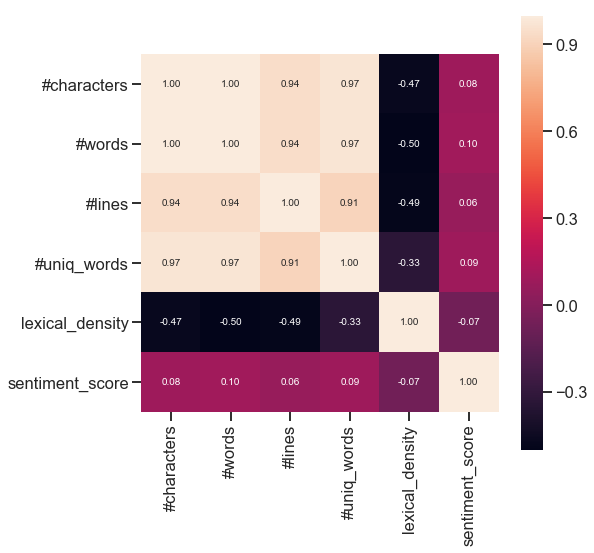

In [25]:
corr = df.corr()
plt.figure(figsize=(8, 8))
sns.heatmap(corr, annot=True, fmt='.2f', square=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

## 4.3 Pairwise relationships

Visualize pairwise combinations of continuous variables over `sentiment` category

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


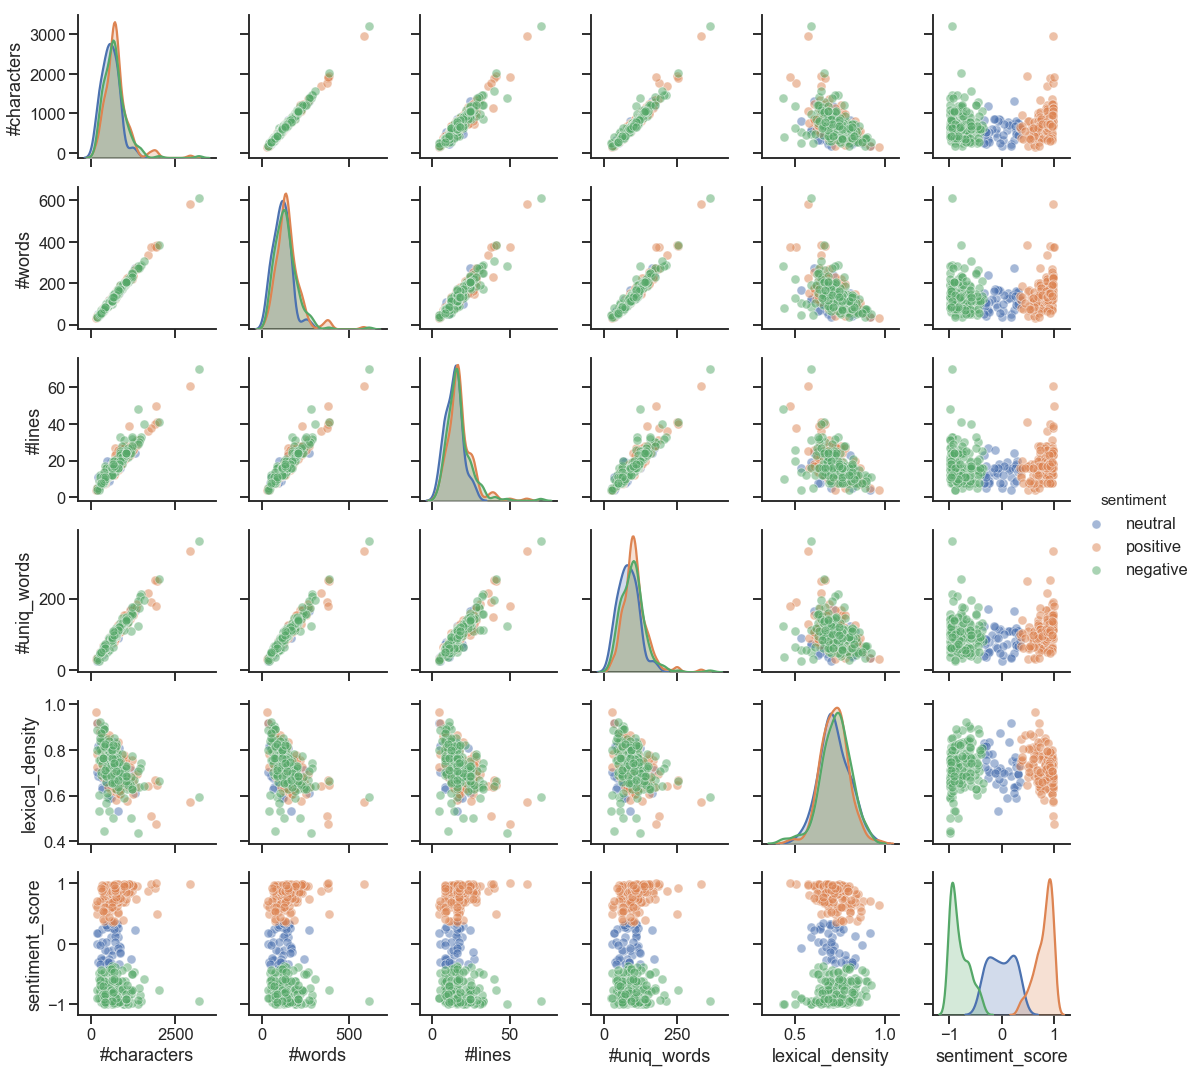

In [26]:
sns.pairplot(df, hue='sentiment', hue_order=['neutral', 'positive', 'negative'], 
             plot_kws={'alpha': 0.5})

## 4.4 Lexical density sentiments

Songs with lower lexical density tend to have strong sentiments (negative and positive)

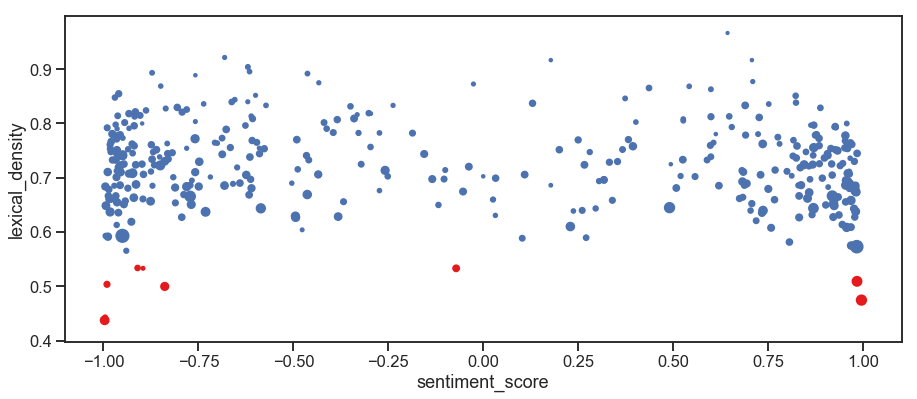

In [58]:
# Songs with lower lexical density tend to have strong sentiments
df.plot.scatter(x='sentiment_score', y='lexical_density', s=df['#characters']/20,
                c=np.where(df['lexical_density'].le(0.55), '#e41a1c', '#4c72b0'),
                figsize=(15, 6))
# size = df['#characters']/20
# color = np.where(df['lexical_density'] 중 less equal 0.55 

## 4.5 Non-parametric estimates

- Range of `unique words` is limited in `neutral` songs
- `Negative` songs tend to have higher lexical density but also larger spread
- `Negative` songs tend to lower `unique words` over `Positive` songs

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:2612: UserWarning: The `lvplot` function has been renamed to `boxenplot`. The original name will be removed in a future release. Please update your code. 
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:2612: UserWarning: The `lvplot` function has been renamed to `boxenplot`. The original name will be removed in a future release. Please update your code. 
  warnings.warn(msg)


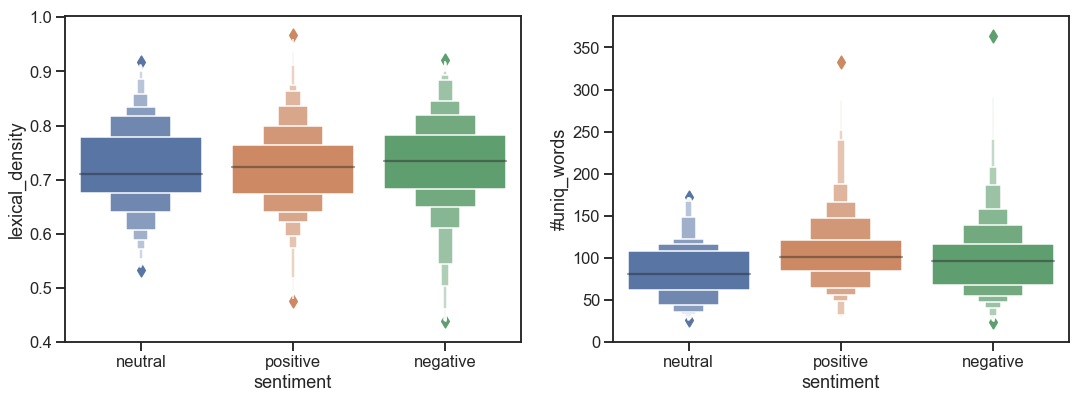

In [28]:
cols_metrics = ['lexical_density', '#uniq_words']
fig, axs = plt.subplots(figsize=(18, 6), ncols=len(cols_metrics))
for i, c in enumerate(cols_metrics):
    sns.lvplot(x='sentiment', y=c, data=df, ax=axs[i], order=['neutral', 'positive', 'negative'])

Looking at these same distributions with non-overlapping points.

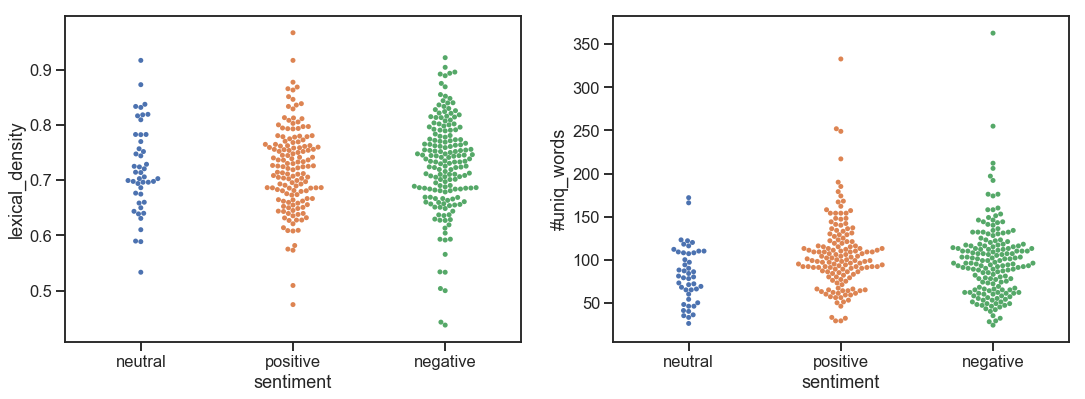

In [29]:
cols_metrics = ['lexical_density', '#uniq_words']
fig, axs = plt.subplots(figsize=(18, 6), ncols=len(cols_metrics))
for i, c in enumerate(cols_metrics):
    sns.swarmplot(x='sentiment', y=c, data=df, ax=axs[i], order=['neutral', 'positive', 'negative'])

# 5. Song Generator via Markov chain
We use a simplistic Markov chain model to generate song from a West's corpus

- The last two words are the current state.
- Next word depends on last two words only, or on present state only.
- The next word is randomly chosen from a statistical model of the corpus.

마르코프 성질은 과거와 현재 상태가 주어졌을 때의 미래 상태의 조건부 확률 분포가 과거 상태와는 독립적으로 현재 상태에 의해서만 결정된다는 것을 뜻한다


In [30]:
# Machine generated lyrics using Markov
import re
import random
from collections import defaultdict


class MarkovRachaita:
    def __init__(self, corpus='', order=2, length=8):
        self.order = order
        self.length = length
        self.words = re.findall("[a-z']+", corpus.lower())
        self.states = defaultdict(list)

        for i in range(len(self.words) - self.order):
            self.states[tuple(self.words[i:i + self.order])].append(self.words[i + order])

    def gen_sentence(self, length=8, startswith=None):
        terms = None
        if startswith:
            start_seed = [x for x in self.states.keys() if startswith in x]
            if start_seed:
                terms = list(start_seed[0])
        if terms is None:
            start_seed = random.randint(0, len(self.words) - self.order)
            terms = self.words[start_seed:start_seed + self.order]

        for _ in range(length):
            terms.append(random.choice(self.states[tuple(terms[-self.order:])]))

        return ' '.join(terms)

    def gen_song(self, lines=10, length=8, length_range=None, startswith=None):
        song = []
        if startswith:
            song.append(self.gen_sentence(length=length, startswith=startswith))
            lines -= 1
        for _ in range(lines):
            sent_len = random.randint(*length_range) if length_range else length
            song.append(self.gen_sentence(length=sent_len))
        return '\n'.join(song)

## 5.1 Generate Random Song

In [31]:
kanyai = MarkovRachaita(corpus=' '.join(df.lyrics))
kanyai.gen_song(lines=10, length_range=[5, 10])

"should just go and get a shot of\ntime i wanna dip that ass i got a\nlouis vuitton shit ain't cheap mayn dawg i can't even\nkeep niggas traumatized they tryna put me\nget ya pretty girl sad reputation start a conversation like\nlet my nightmares go i diss hoes i'm very wild and i\ni was in the bed squeak there goes the bed squeak\nlook all through my head i woke\nwhat fuck whatever y'all been hearin' fuck what nobody think\nmessage break ups the casualty of tour how she order"

## 5.2 Generate Song on Trump

In [32]:
kanyai.gen_song(lines=10, length_range=[5, 10], startswith='trump')

"donald trump nigga i'm gon' ask him what more could\ntell the conductor just drive so fast\nstay cool like any other nigga buy ice to stay at ease\nyou to buy your shorty watch barney's we head to barney's\nin your serato you ain't interested in\nfucking nation they say oh you had to act ballerific like it's\ndon't try to treat me like what the what the\nan entrepreneur now if you fall you land on a\nlet your guard down you and i know it's corny\nholler at the top includes what's your pleasure"

# 6. Topic Modelling

We'll create a simplistic topic model using Non-Negative Matrix Factorization (NMF) to group lyrics into topics.
LDA is another quite popular alternative for topic modelling.
We generate a tf-idf transformer, to apply it to the bag of words matrix that NMF will process with the TfidfVectorizer.

In [33]:
# Song themes via Simplistic topic modelling

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

no_topics = 5
no_features = 50
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(df.lyrics)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)

def get_topics(model, feature_names, no_topwords):
    for topic_id, topic in enumerate(model.components_):
        print('topic %d:' % (topic_id))
        print(' '.join([feature_names[i] for i in topic.argsort()[:-no_topwords-1:-1]]))

s = pd.DataFrame(nmf.transform(tfidf)).idxmax(1)

List the derived topics, each represented as a list of top terms

In [34]:
# NMP topics
get_topics(nmf, tfidf_feature_names, 20)

topic 0:
know just don say way let want man cause tell people ve feel make look did love gotta baby ll
topic 1:
nigga just make want niggas time people new gon don say come did need good told way said god bad
topic 2:
like black told girl don make ain said people em hit gon ll love feel come say man look know
topic 3:
got ain niggas shit bitch fuck girl new said bad ass ll cause love need told man hit bout good
topic 4:
right life yeah time let look cause did got need ll good ve money like man tell baby gon shit


## 6.1 Top n-grams from topics

Now, let's get top tri-grams for each of these topics/themes

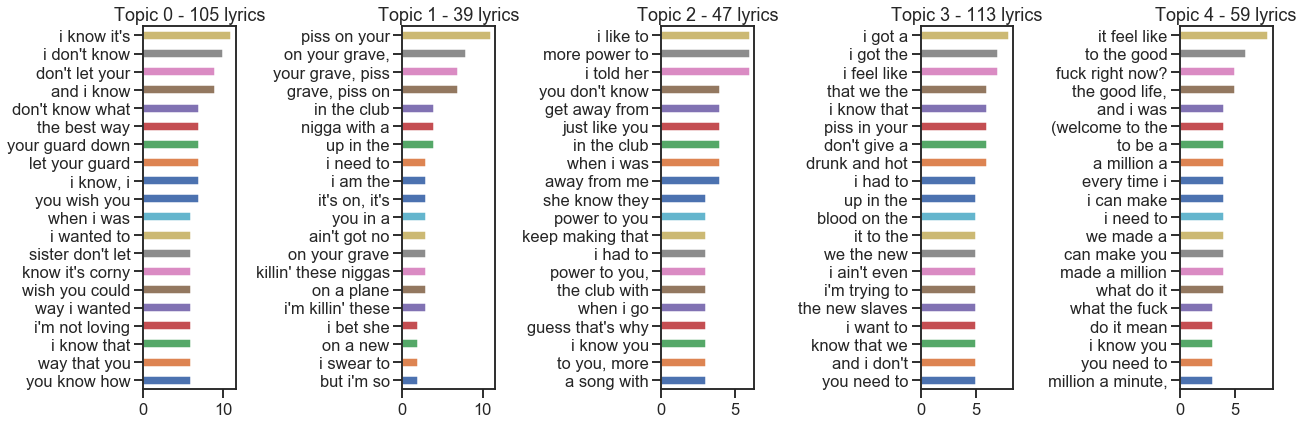

In [35]:
# Top n-grams from the topics
topics = set(s)
fig, axs = plt.subplots(figsize=(18, 6), ncols=len(topics))
for i, v in enumerate(topics):
    dfsm = df.loc[s.eq(v), 'lyrics']
    ngram = pd.Series(get_ngrams_from_series(dfsm, 3)).value_counts()[:20][::-1]
    ngram.plot(kind='barh', ax=axs[i], title='Topic {} - {} lyrics'.format(v, s.eq(v).sum()))
plt.tight_layout()
df['topic'] = s.astype(str).radd('Topic ')

In [36]:
df.head()

,lyrics,#characters,#words,#lines,#uniq_words,lexical_density,sentiment_score,sentiment,topic
0,Let the suicide doors up\nI threw suicides on ...,675,131,16,99,0.755725,-0.6658,negative,Topic 2
1,"She said, ""'Ye, can we get married at the mall...",788,149,18,112,0.751678,-0.8605,negative,Topic 3
2,"Break records at Louis, ate breakfast at Gucci...",1479,286,33,212,0.741259,-0.9499,negative,Topic 0
3,What you doin' in the club on a Thursday?\nShe...,632,101,16,80,0.792079,-0.9900,negative,Topic 3
4,"I wanna fuck you hard on the sink\nAfter that,...",748,144,18,96,0.666667,-0.9869,negative,Topic 3


## 6.2 Sentiment across Topics

- Topic 0 has songs mostly concentrated for high polar sentiments
- Topic 1 songs which are positive have a high score
- Topic 2 doesn't have neutral songs

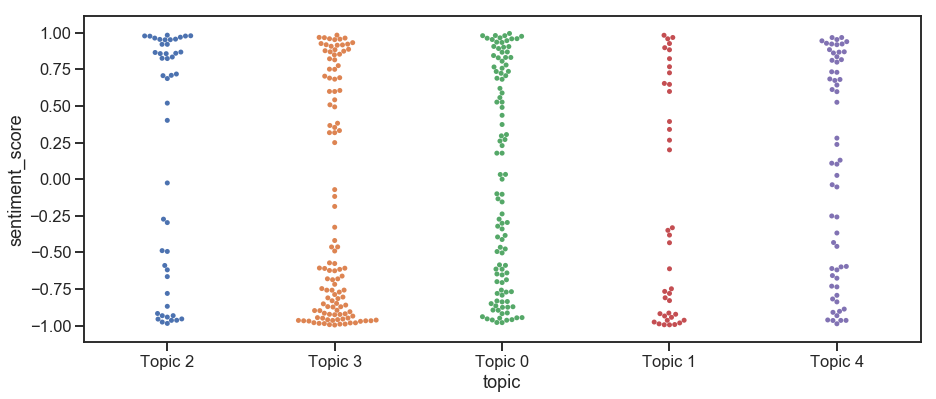

In [37]:
fig, axs = plt.subplots(figsize=(15, 6))
sns.swarmplot(x='topic', y='sentiment_score', data=df)

## 6.3 Lexical Density across Topics

- Lexical density is mostly concentrated around 0.7 higher for Topic 0
- Lexical density is higher for Topic 1

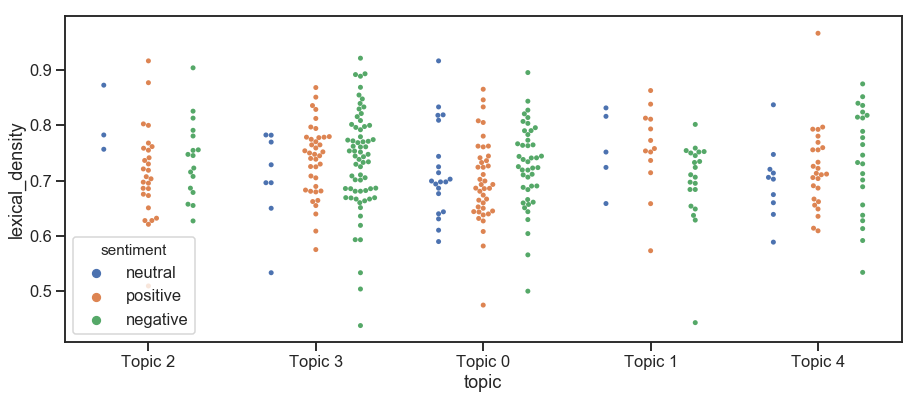

In [38]:
fig, axs = plt.subplots(figsize=(15, 6))
sns.swarmplot(x='topic', y='lexical_density', hue='sentiment',
              hue_order=['neutral', 'positive', 'negative'], data=df, dodge=True)

# 7. Next Steps

With that we've covered what we began with. Kanye's corpus has good variations with mix of lexical sentiments. 

- We could improve on theme based Kanye's machine generated songs
- Topic modelling can made easier to interpret the themes
- Detect Names, Brands, Emotions mentioned in songs
- Add external data (date, genre, audio, visual, billboard reception, youtube views etc)